<h1>Exploratory Data Analysis (EDA)</h1>

<h3>1. Importing Librairies</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ul>
<li>Pandas → data loading</li>
<li>Matplotlib → low-level plotting</li>
<li>Seaborn → high-level statistical plots</li>
</ul>


<h3>2. Data Loading</h3>

In [2]:
df = pd.read_csv("../data/raw/small_business_sales.csv")
df.head()

,month,season,marketing_spend,website_visits,conversion_rate,num_customers,avg_order_value,discount_rate,revenue
0,2023-01,Winter,9270,25114,0.0419,1051,65.82,20,51733.52
1,2023-02,Winter,2860,8403,0.0292,245,68.88,10,13249.35
2,2023-03,Spring,7390,22536,0.0428,965,68.94,0,68308.74
3,2023-04,Spring,7191,22896,0.0440,1006,67.55,15,59930.53
4,2023-05,Spring,7734,28443,0.0288,818,57.93,20,41251.89


This is important to :
<ul>
<li>Verify data loaded correctly</li>
<li>check column names</li>
<li>spot obvious issues</li>
<ul>

<h3>3. Basic Informations</h3>

In [3]:
df.info()
#gives structural informations: number of rows, column names, data types(int, float, object) and missing values(non-null count)
df.describe()
#generates summary statistics for numeric column : count, mean, std, min/max, 25%,50%,75%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   month            24 non-null     object 
 1   season           24 non-null     object 
 2   marketing_spend  24 non-null     int64  
 3   website_visits   24 non-null     int64  
 4   conversion_rate  24 non-null     float64
 5   num_customers    24 non-null     int64  
 6   avg_order_value  24 non-null     float64
 7   discount_rate    24 non-null     int64  
 8   revenue          24 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.8+ KB


,marketing_spend,website_visits,conversion_rate,num_customers,avg_order_value,discount_rate,revenue
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,6755.750000,21368.541667,0.041537,884.041667,62.994583,13.750000,50367.970833
std,2586.133462,9221.276154,0.015291,490.752083,10.391453,6.298723,27703.012613
min,2466.000000,7192.000000,0.019600,152.000000,44.920000,0.000000,11470.730000
25%,4526.750000,14127.000000,0.029100,568.000000,55.982500,10.000000,31557.057500
50%,7251.000000,22029.000000,0.041400,834.500000,63.175000,15.000000,45708.990000
75%,8402.000000,27160.250000,0.053025,1059.750000,68.895000,20.000000,68166.502500
max,11274.000000,43562.000000,0.070500,2269.000000,93.720000,20.000000,110204.110000


This helps to:
<ul>
<li>detect wrong data types</li>
<li>missing data problems</li>
<li>understand typical values, spread, outliers</li>
<li> learn ranges (important for realism)</li>
</ul>


<h3>4. Understanding business behavior</h3>

<h4>4.1. Revenue Over Time</h4>

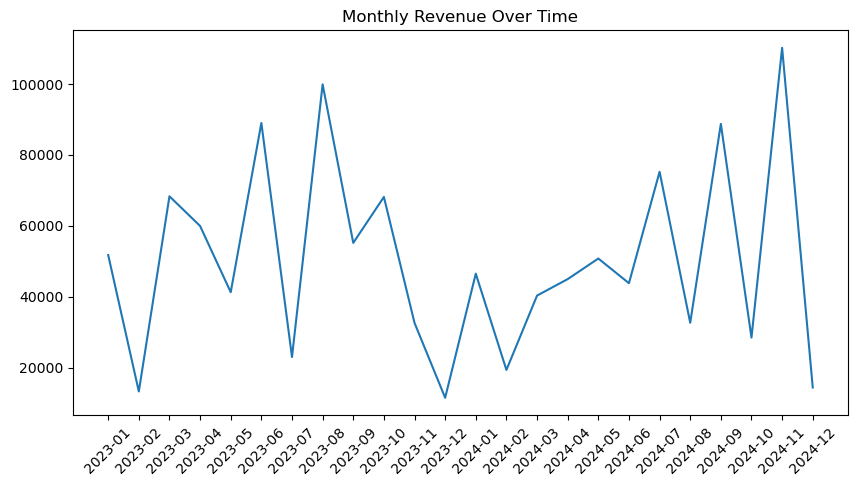

In [4]:
plt.figure(figsize=(10,5))
plt.plot(df["month"],df["revenue"])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Over Time")
plt.show()

This matters because:
<ul>
<li>You see seasonality</li>
<li>You see trends</li>
</ul>
<br>
→ You validate realism


<h4> 4.2. Marketing vs Revenue</h4>

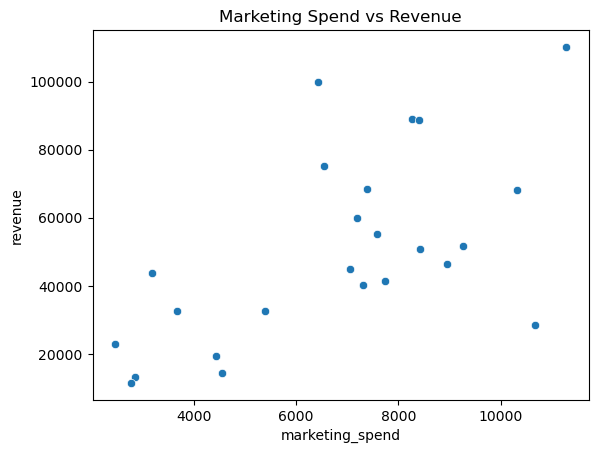

In [6]:
sns.scatterplot(x="marketing_spend",y="revenue",data=df)
#plots individuals points( each point = one observation )
plt.title("Marketing Spend vs Revenue")
plt.show()

This plot shows that :<br>
Higher marketing spend generally increases revenue, but with <strong>variability</strong>.<br><br>
→ That’s realistic.


<h4> 4.3. Website visits → customers</h4>

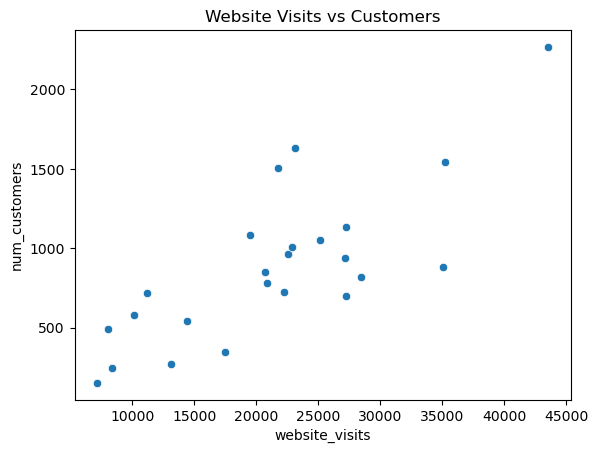

In [7]:
sns.scatterplot(x="website_visits", y="num_customers", data=df)
plt.title("Website Visits vs Customers")
plt.show()

→ This validates the conversion logic : <br>
Do more visits lead to more customers ?

<h3> 5. Seasonality check </h3>

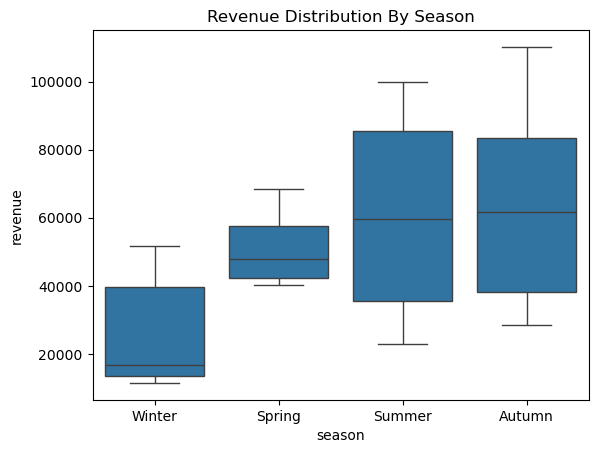

In [8]:
sns.boxplot(x="season", y="revenue", data=df)
#shows median, quartiles, spread and outliers
plt.title("Revenue Distribution By Season")
plt.show()


This allows to :<br>
check domain assumptions(most profitable/volatile season)<br>
→ validate season effect


<h3> 6. Correlation heatmap (decision-making tool)</h3>

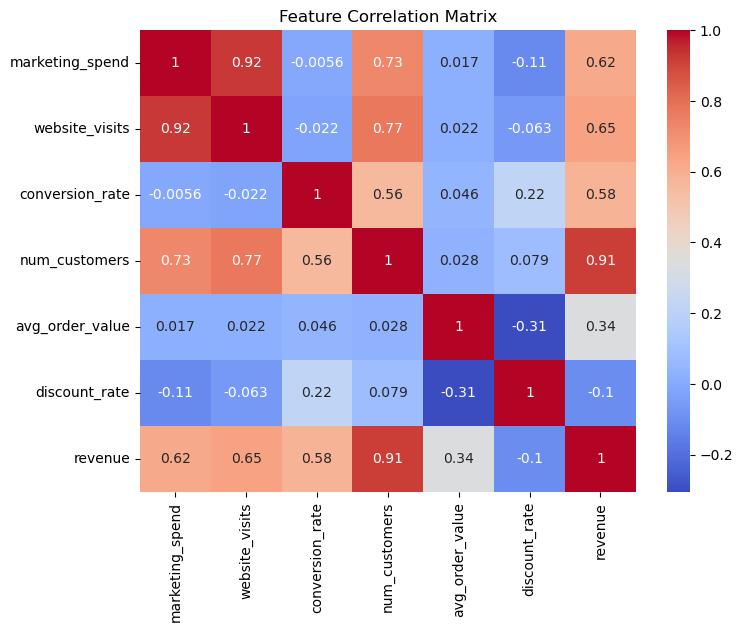

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(), annot=True, cmap="coolwarm")
#df.select_dtypes("number"): keeps only numeric columns
#corr(): computes Pearson correlation (range:-1 to +1)
#annot=True: shows values inside cells
# cmap="coolwarm": color gradient
plt.title("Feature Correlation Matrix")
plt.show()

This plot shows <strong>feature relationships</strong> to :<br>
<ul>
<li>strong predictors of revenue</li>
<li>multicollinearity detection</li>
<li>feature selection for ML</li>
</ul>